# Traffic Signs Detection Recognition

In [ ]:
!wget  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip

--2023-12-02 15:04:15--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104177081 (1.0G) [application/zip]
Saving to: ‘TrainIJCNN2013.zip’

TrainIJCNN2013.zip  100%[===================>]   1.03G  96.9MB/s    in 12s     

2023-12-02 15:04:27 (88.8 MB/s) - ‘TrainIJCNN2013.zip’ saved [1104177081/1104177081]



In [ ]:
!unzip TrainIJCNN2013.zip

In [ ]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import numpy as np
import glob
import pandas as pd

images_sign = list(map(lambda imageFileName: cv2.imread(imageFileName),
                              glob.glob('/content/TrainIJCNN2013/*.ppm')))
print("Done importing images.")

Done importing images.


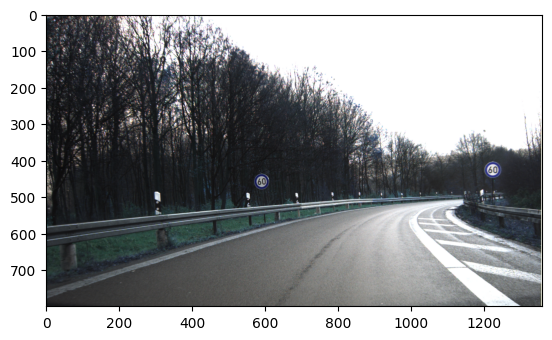

In [ ]:
image_sign_org = images_sign[2].copy()
plt.imshow(image_sign_org)

In [ ]:
# read sign name
sign_name = pd.read_csv("signnames.csv",index_col='ClassId')
sign_name

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [ ]:
print("Total Number of Images = ", len(images_sign))
print("Image data shape = ",images_sign[0].shape)
print("Number of Classes = ",sign_name.shape[0])

Total Number of Images =  600
Image data shape =  (800, 1360, 3)
Number of Classes =  43


# Image Pre-processing

(-0.5, 1359.5, 799.5, -0.5)

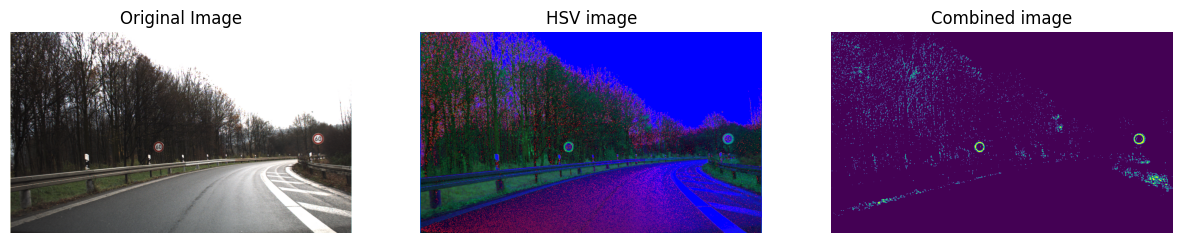

In [ ]:
def processing_img(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  HSV_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
  bin1 = cv2.inRange(HSV_img,(0,80,0),(12,255,255)) # intervalle [0,12],mettre en 1
  bin2 = cv2.inRange(HSV_img,(160,80,0),(100,255,255)) # intervalle [160,100],mettre en 1
  bin = cv2.bitwise_or(bin1,bin2)  #combiner
  '''
  To visualize
  '''
  return img,HSV_img,bin

img,HSV_img,Precessedimg = processing_img(image_sign_org)
# visulize
fig = plt.figure(figsize=(15,15))
(ax1,ax2,ax3) = fig.subplots(1,3)
ax1.imshow(img)
ax2.imshow(HSV_img)
ax3.imshow(Precessedimg)
ax1.set_title("Original Image")
ax2.set_title("HSV image")
ax3.set_title("Combined image")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

(-0.5, 1359.5, 799.5, -0.5)

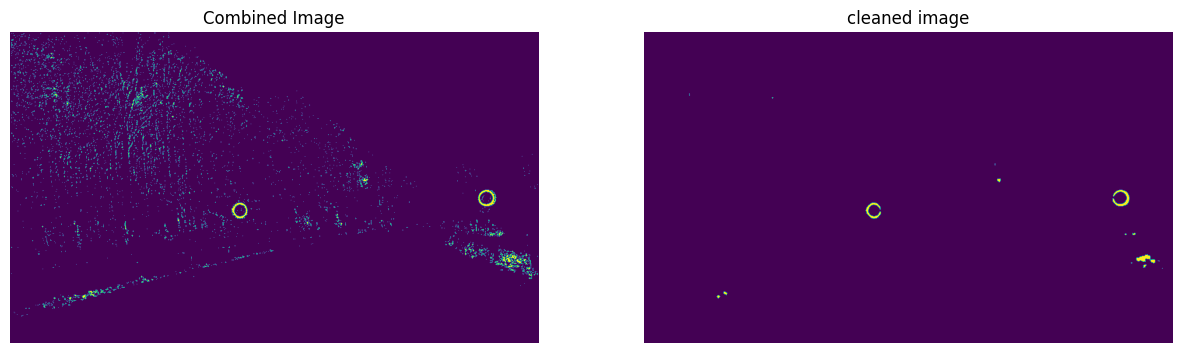

In [ ]:
def remove_noise(img):
  dst = cv2.medianBlur(img,9)
  return dst

cleaned_img = remove_noise(Precessedimg)
# visulize
fig = plt.figure(figsize=(15,15))
(ax1,ax2) = fig.subplots(1,2)
ax1.imshow(Precessedimg)
ax2.imshow(cleaned_img)
ax1.set_title("Combined Image")
ax2.set_title("cleaned image")
ax1.axis("off")
ax2.axis("off")

Number of contours : 17
Number of ROIs : 2


(-0.5, 39.5, 39.5, -0.5)

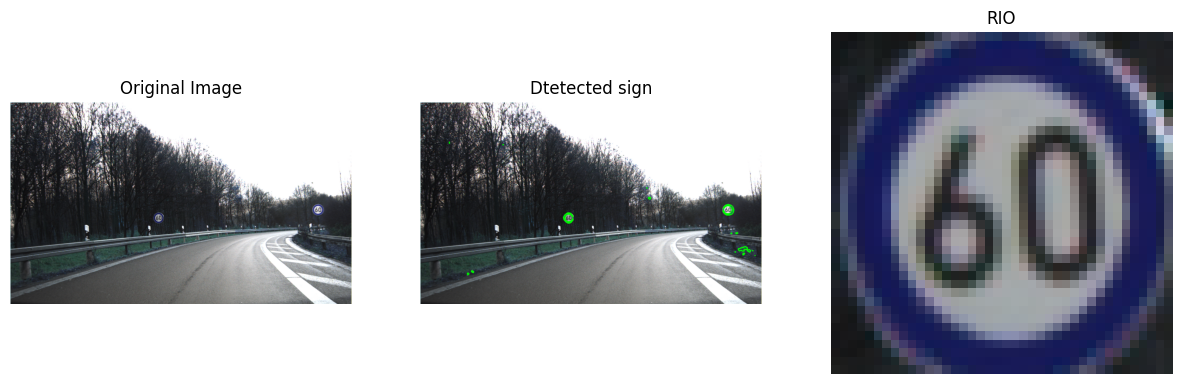

In [ ]:
from PIL import Image

def findContours(img,origenal_img):
  contours, _=cv2.findContours(img,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  Rois=[]
  Rect=[]
  print("Number of contours : " + str(len(contours)))
  for c in contours:
    x,y,h,w=cv2.boundingRect(c)

    roi = origenal_img[y:y+h,x:x+w]
    if roi.shape[0] >= 35 and roi.shape[1] >= 35:
      resized_IMG = cv2.resize(roi,(40,40),interpolation=cv2.INTER_AREA)
      Rois.append(resized_IMG)
      Rect.append(cv2.boundingRect(c))

  # The code below is for visualization purposes only.
    image_with_contours_drawn = origenal_img.copy()
    cv2.drawContours(image_with_contours_drawn,contours, -1, (0, 255, 0), 3)
  print("Number of ROIs : " + str(len(Rois)))


  return Rois, Rect , image_with_contours_drawn

Rois, Rect, image_with_contours_drawn = findContours(cleaned_img,images_sign[2])

fig = plt.figure(figsize=(15,15))
(ax1,ax2,ax3) = fig.subplots(1,3)
ax1.imshow(image_sign_org)
ax2.imshow(image_with_contours_drawn)
ax3.imshow(Image.fromarray(Rois[0]))
ax1.set_title("Original Image")
ax2.set_title("Dtetected sign")
ax3.set_title("RIO")
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

# Recognition

In [ ]:
import cv2
import glob
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
import random


# Load images.
rios_sign=[]
for id in range(43):
  if id<10:
    signs = list(map(lambda imageFileName: (cv2.imread(imageFileName,0),id),
                              glob.glob('/content/TrainIJCNN2013/0'+str(id)+'/*.ppm')))
  else:
    signs = list(map(lambda imageFileName: (cv2.imread(imageFileName,0),id),
                              glob.glob('/content/TrainIJCNN2013/'+str(id)+'/*.ppm')))
  rios_sign.extend(signs)

print("Done importing images.")

Done importing images.


Text(0.5, 1.0, 'label : 0')

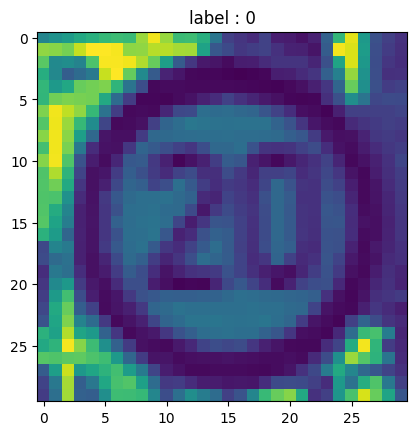

In [ ]:
rio_sign_org = rios_sign[0][0].copy()
plt.imshow(rio_sign_org)
plt.title("label : "+str(rios_sign[0][1]))

In [ ]:
print("Total Number of Images = ", len(rios_sign))
print("Image data shape = ",rios_sign[0][0].shape)
print("Number of Classes = ",sign_name.shape[0])

Total Number of Images =  853
Image data shape =  (30, 30, 3)
Number of Classes =  43


<ipython-input-98-03fc9af58fed>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


(-0.5, 63.5, 127.5, -0.5)

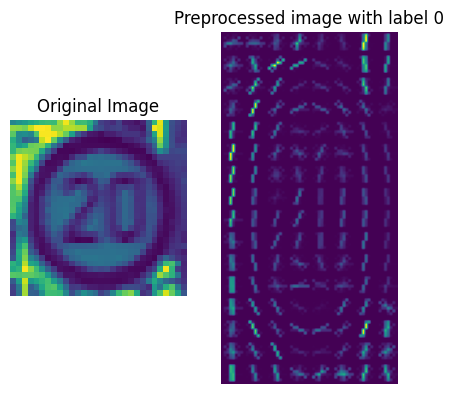

In [ ]:
# HOG
from skimage.feature import hog

def hog_processing(imgs):
  hog_imgs = []
  hog_features=[]
  lables=[]
  for img in imgs :
    resized_img=cv2.resize(img[0],(64,128))
    hog_feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=False)
    hog_imgs.append(hog_image)
    hog_features.append(hog_feature)
    lables.append(img[1])

  return hog_imgs,hog_features,lables

hog_imgs,hog_features,lables = hog_processing(rios_sign)

# visulize
fig = plt.figure(figsize=(5,5))
(ax1,ax2) = fig.subplots(1,2)
ax1.imshow(rio_sign_org)
ax2.imshow(hog_imgs[0])
ax1.set_title("Original Image")
ax2.set_title("Preprocessed image with label "+str(lables[0]))
ax1.axis("off")
ax2.axis("off")

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

hog_features = np.array(hog_features)
lables = np.array(lables)

X_features = hog_features.astype(np.float32)
Y_lables = lables.astype(np.float32)

# split data into train data & test data
X_train,X_test,y_train,y_test=train_test_split(X_features,Y_lables,test_size=.2,shuffle=True)
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (682, 3780)
y_train shape :  (682,)
X_test shape :  (171, 3780)
y_test shape :  (171,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, Flatten, Rescaling,MaxPooling2D

num_classes = sign_name.shape[0]
img_height = 40
img_width = 40

# Create the Sequential model
model = Sequential()

model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(16, 3, padding='same',activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same',activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same',activation='relu'))

model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(num_classes,activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 40, 40, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 40, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 20, 20, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)       

In [ ]:
!pip install TensorBoard

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir = os.path.join('Logs')
TB_callback = TensorBoard(log_dir=log_dir)

# callback for earlyStopping
Earlystopping_callback = EarlyStopping(patience=20, verbose=1)

In [ ]:
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=2,callbacks=[TB_callback,Earlystopping_callback])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir={log_dir}